In [1]:
import keras
from keras import layers

In [3]:
input_img = keras.Input(shape=(784,))

In [6]:
dim = 32 # 784/32 = 25% approax.

In [11]:
encoded = layers.Dense(dim, activation='relu' )(input_img)

In [13]:
decoded = layers.Dense(784,activation='sigmoid')(encoded)

In [15]:
autoencoder = keras.Model(input_img, decoded)

In [16]:
encoder = keras.Model(input_img, encoded)

In [18]:
encoded_input = keras.Input(shape=(dim, ))

In [19]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
print(encoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
decoder_layer = autoencoder.layers[-1]

In [24]:
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [25]:
print(decoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [27]:
from keras.datasets import mnist

In [28]:
import numpy as np

In [36]:
(x_train, y_train ), (x_test, y_test) = mnist.load_data()

In [37]:
print(x_train.shape)

(60000, 28, 28)


In [38]:
print(x_test.shape)

(10000, 28, 28)


In [39]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255

In [40]:
print(x_train.shape)

(60000, 28, 28)


In [41]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [43]:
autoencoder.fit(x_train, x_train, batch_size=256, epochs=50, shuffle=True,validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 17s 13ms/step - loss: 0.3836 - val_loss: 0.1930
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1824 - val_loss: 0.1540
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1498 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1327 - val_loss: 0.1229
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1220 - val_loss: 0.1148
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1138 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1069 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1027 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0998 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0979 - val_l

In [44]:
encoded_imgs = encoder.predict(x_test)
decoder_imgs = decoder.predict(encoded_imgs)

In [45]:
import matplotlib.pyplot as plt


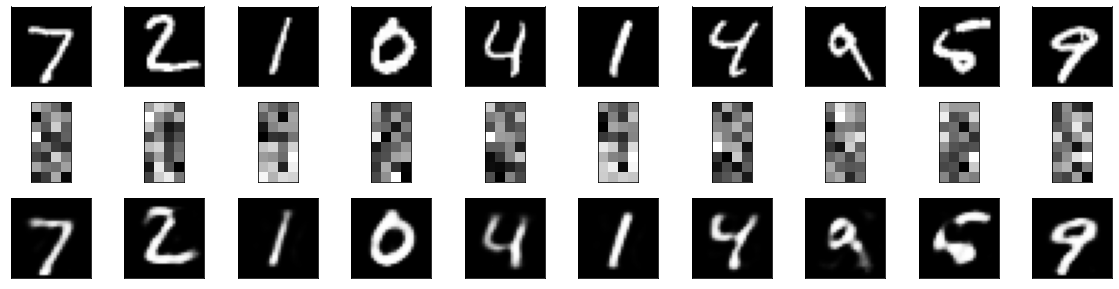

In [50]:
plt.figure(figsize=(20,5))
n=10
for i in range(n):
    ax = plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3,n,i+1+2*n)
    plt.imshow(decoder_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

